### Probabilistic logic and statisical inference

### Random number generators and hacker statistics
#### Hacker statistics 

- Uses simulated repeated measurements to compute probabilities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Bernoulli trial 
- An experiment that has two options: 'success' (True) and 'failure' (False).

### Random number seed 
- Integer fed into random number generating algorithm
- Manually seed random number generator if you need reproducibility
- Specified using `np.random.seed()`

In [2]:
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [3]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [4]:
np.sum(heads)

1

In [5]:
n_all_heads = 0

for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads ==4:
        n_all_heads += 1

In [6]:
n_all_heads/10000

0.0619

### Hacker stats probabilities 
- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials with the outcome of interest

In [7]:
# Generating random numbers using the np.random module
np.random.seed(42)
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

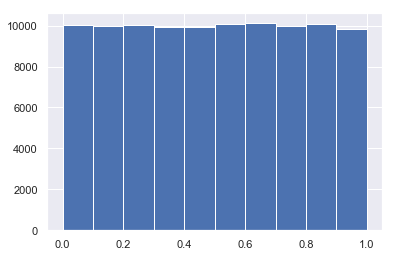

In [8]:
_ = plt.hist(random_numbers)
plt.show()

In [9]:
def perform_bernoulli_trials(n, p):
    '''Perfoms n Bernoulli trials with success probability p 
    and return number of successes.'''
    n_success = 0
    for i in range(n):
        random_number = np.random.random
        if random_number < p:
            n_success += 1
    return n_success

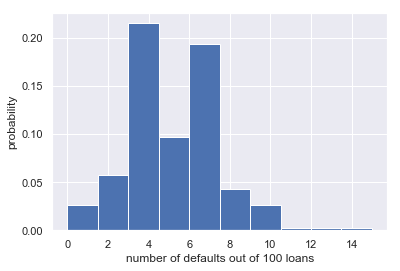

In [10]:
#How many defaults might we expect?
np.random.seed(42)
n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()

In [11]:
# Will the bank fail 
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

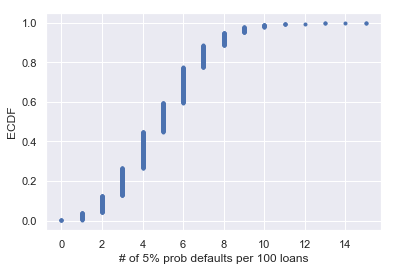

In [12]:
x, y = ecdf(n_defaults)
_ = plt.plot(x,y, marker='.', linestyle='none')
_ = plt.xlabel('# of 5% prob defaults per 100 loans')
_ = plt.ylabel('ECDF')
plt.show()

In [13]:
n_lose_money = np.sum(n_defaults >= 10)
print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.022


### Probability and distributions and stories: The Binomial distribution

#### Probability mass funtion (PMF)
- The set of probabilites of discrete outcomes

#### Discrete Uniform PMF
- 1/6 on the roll of a die <br>

#### Proability distribution 
- A mathematical description of outcomes<br>

#### Discrete Uniform distribution: the story 
- The outcome of rolling a single fair die is Discrete Uniformly distributed.<br>

#### Binomial distribution: the story 
- The number of r successes in n Bernoulli trials with the probability * of success, is Binomially distributed.
- The number *r* **of heads** in *4* **coin flips** with probability of *0.5* of **heads**, is Binomially distributed.  

In [1]:
# Sampling from the Binomial distribution 
np.random.binomial(4, 0.5)

NameError: name 'np' is not defined

In [15]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

### The Binomial PMF

In [16]:
samples = np.random.binomial(60, 0.1, size=10000)
#_ = plt.plot(samples)

### The Binomial CDF

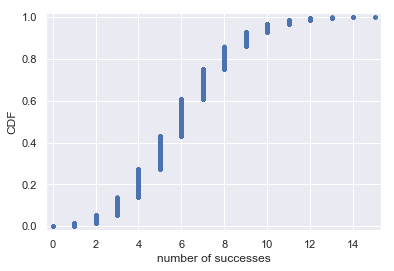

In [17]:
x, y = ecdf(samples)
_ = plt.plot(x,y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

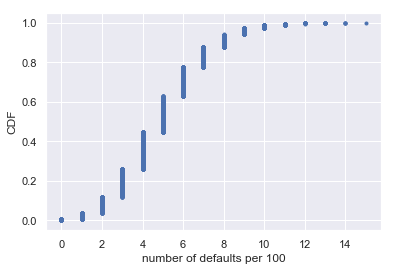

In [19]:
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)
x, y = ecdf(n_defaults)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults per 100')
_ = plt.ylabel('CDF')
plt.show()

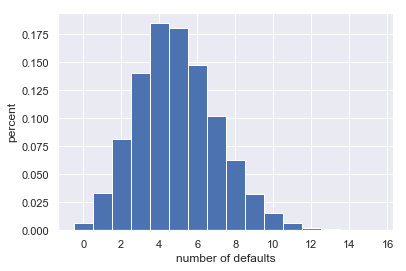

In [21]:
# Plotting the Binomial PMF
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
_ = plt.hist(n_defaults, density=True, bins=bins)
_ = plt.xlabel('number of defaults')
_ = plt.ylabel('percent')
plt.show()

### Poisson procsesses and the Poisson distribution <br>
#### Poisson process
- The timing of the next event is completely independant of when the previous event happened

### Examples of Poisson processes
- Natural births in a given hospital
- Hit on a website during a given hour 
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents 
- Buses in Poissonville 

### Poisson distribution 
- The number *r* of arrivals of a Poisson process in given time interval with average rate of $ \lambda $ arrivals per interval is Poisson distributed. 
- The number of *r* hits on a website in one hour with an average hit rate of ** 6 hits per hour **
is Poisson distributed. 

### Poisson PMF
#### Poisson Distribution 
- Limit of the Binomial distribution for low probability of success and large number of trials. 
- That is, for rare events

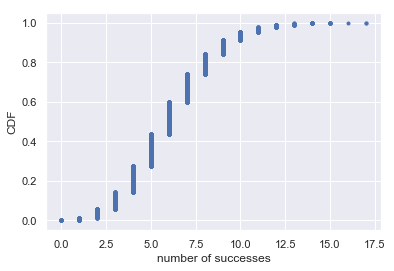

In [22]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

In [24]:
samples_poisson = np.random.poisson(10, size=10000)
print('Poisson   :', np.mean(samples_poisson),
                     np.std(samples_poisson))
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
for i in range(3):
    samples_binomial = np.random.binomial(n = n[i], p = p[i], size=10000)
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson   : 10.0101 3.171434689537213
n = 20 Binom: 10.0192 2.2522058875688966
n = 100 Binom: 10.0632 2.993260055524745
n = 1000 Binom: 9.9812 3.1373311205545393


In [28]:
n_nohitters = np.random.poisson(251/115, size=10000)
n_large = np.sum(n_nohitters >= 7)
p_large = n_large / 10000
p_large

0.0063

In [ ]:
samples_std1 = 